<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Fundamentos de Lógica Difusa</p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
Técnicas de Inteligencia Artificial - Visión de Máquina</p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>Prof. Daniel Vargas Medina</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email: davargasme@unal.edu.co</p>
<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>INGENIERÍA MECATRONICA</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="fig/Escudo_UN.png",width=100,height=100>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>06 de junio de 2022</p>

# Instalar: scikit-learn y scikit-fuzzy

* pip install -U scikit-learn
* pip install -U scikit-fuzzy


# The Tipping Problem

* http://pythonhosted.org/scikit-fuzzy/userguide/fuzzy_control_primer.html

* Taking the tipping example full circle, if we were to create a controller which estimates the tip we should give at a restaurant, we might structure it as such:

<h2>Antecednets (Inputs)</h2>
* service
    * Universe (ie, crisp value range): How good was the service of the waitress, on a scale of 1 to 10?
    * Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing
* food quality
    * Universe: How tasty was the food, on a scale of 1 to 10?
    * Fuzzy set: bad, decent, great

<h2>Consequents (Outputs)</h2>
* tip
    * Universe: How much should we tip, on a scale of 0% to 25%
    * Fuzzy set: low, medium, high

<h2>Rules</h2>
* IF the service was good or the food quality was good, THEN the tip will be high.
* IF the service was average, THEN the tip will be medium.
* IF the service was poor or the food quality was poor THEN the tip will be low.

<h2>Usage<h2>
* If I tell this controller that I rated:
    * the service as 9.8, and
    * the quality as 6.5,
* it would recommend I leave:
    * a 19.76% tip.


# Creating the Tipping Controller Using the skfuzzy control API
* We can use the skfuzzy control system API to model this. First, let’s define fuzzy variables



In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

import matplotlib.pyplot as plt
%matplotlib inline


# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 12.5])
tip['medium'] = fuzz.trimf(tip.universe, [0, 12.5, 25])
tip['high'] = fuzz.trimf(tip.universe, [12.5, 25, 25])

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


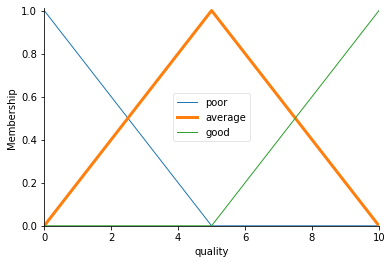

In [3]:
# You can see how these look with .view()
quality['average'].view()

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


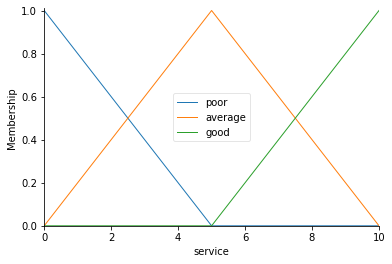

In [4]:
service.view()

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


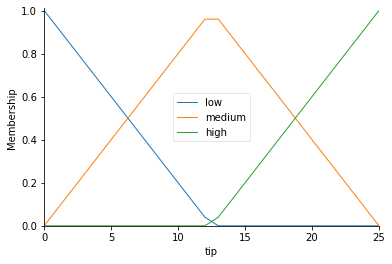

In [5]:
tip.view()

# Fuzzy rules
* Now, to make these triangles useful, we define the fuzzy relationship between input and output variables. For the purposes of our example, consider three simple rules:

* If the food is poor OR the service is poor, then the tip will be low
* If the service is average, then the tip will be medium
* If the food is good OR the service is good, then the tip will be high.



(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

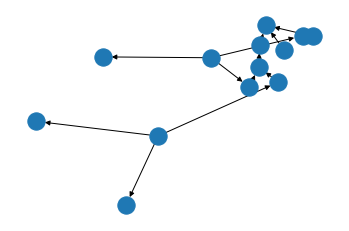

In [6]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

# Control System Creation and Simulation
* Now that we have our rules defined, we can simply create a control system via:

In [7]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

* In order to simulate this control system, we will create a ControlSystemSimulation. 
* Think of this object representing our controller applied to a specific set of cirucmstances. 
* For tipping, this might be tipping Sharon at the local brew-pub. 
* We would create another ControlSystemSimulation when we’re trying to apply our tipping_ctrl for Travis at the cafe because the inputs would be different.

In [8]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

* We can now simulate our control system by simply specifying the inputs and calling the compute method. 
* Suppose we rated the quality 6.5 out of 10 and the service 9.8 of 10.

In [9]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

Once computed, we can view the result as well as visualize it.

19.76409495548962


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


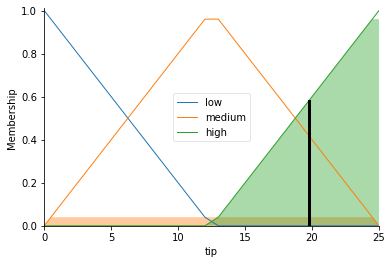

In [10]:
print (tipping.output['tip'])
tip.view(sim=tipping)

* The resulting suggested tip is 19.76%.

<h2>Final thoughts</h2>
* The power of fuzzy systems is allowing complicated, intuitive behavior based on a sparse system of rules with minimal overhead. 
* Note our membership function universes were coarse, only defined at the integers, but fuzz.interp_membership allowed the effective resolution to increase on demand. 
* This system can respond to arbitrarily small changes in inputs, and the processing burden is minimal.

<h1 style="font-size:250%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 80px;">
Otras Funciones</h1>


# Fuzzy Control Systems: Advanced Example


* Many fuzzy control systems are tasked to keep a certain variable close to a specific value. 
* For instance, the temperature for an industrial chemical process might need to be kept relatively constant. 
* In order to do this, the system usually knows two things:

    * The error, or deviation from the ideal value
    * The way the error is changing. This is the mathematical first derivative; we’ll call it delta

* From these two values we can construct a system which will act appropriately.


In [10]:
import numpy as np
import skfuzzy.control as ctrl

# Sparse universe makes calculations faster, without sacrifice accuracy.
# Only the critical points are included here; making it higher resolution is
# unnecessary.
universe = np.linspace(-2, 2, 5)

# Create the three fuzzy variables - two inputs, one output
error = ctrl.Antecedent(universe, 'error')
delta = ctrl.Antecedent(universe, 'delta')
output = ctrl.Consequent(universe, 'output')

# Here we use the convenience `automf` to populate the fuzzy variables with
# terms. The optional kwarg `names=` lets us specify the names of our Terms.
names = ['nb', 'ns', 'ze', 'ps', 'pb']
error.automf(names=names)
delta.automf(names=names)
output.automf(names=names)

# Define complex rules
* This system has a complicated, fully connected set of rules defined below.

In [11]:
rule0 = ctrl.Rule(antecedent=((error['nb'] & delta['nb']) |
                              (error['ns'] & delta['nb']) |
                              (error['nb'] & delta['ns'])),
                  consequent=output['nb'], label='rule nb')

rule1 = ctrl.Rule(antecedent=((error['nb'] & delta['ze']) |
                              (error['nb'] & delta['ps']) |
                              (error['ns'] & delta['ns']) |
                              (error['ns'] & delta['ze']) |
                              (error['ze'] & delta['ns']) |
                              (error['ze'] & delta['nb']) |
                              (error['ps'] & delta['nb'])),
                  consequent=output['ns'], label='rule ns')

rule2 = ctrl.Rule(antecedent=((error['nb'] & delta['pb']) |
                              (error['ns'] & delta['ps']) |
                              (error['ze'] & delta['ze']) |
                              (error['ps'] & delta['ns']) |
                              (error['pb'] & delta['nb'])),
                  consequent=output['ze'], label='rule ze')

rule3 = ctrl.Rule(antecedent=((error['ns'] & delta['pb']) |
                              (error['ze'] & delta['pb']) |
                              (error['ze'] & delta['ps']) |
                              (error['ps'] & delta['ps']) |
                              (error['ps'] & delta['ze']) |
                              (error['pb'] & delta['ze']) |
                              (error['pb'] & delta['ns'])),
                  consequent=output['ps'], label='rule ps')

rule4 = ctrl.Rule(antecedent=((error['ps'] & delta['pb']) |
                              (error['pb'] & delta['pb']) |
                              (error['pb'] & delta['ps'])),
                  consequent=output['pb'], label='rule pb')

* Despite the lengthy ruleset, the new fuzzy control system framework will execute in milliseconds. 
* Next we add these rules to a new ControlSystem and define a ControlSystemSimulation to run it.

In [12]:
system = ctrl.ControlSystem(rules=[rule0, rule1, rule2, rule3, rule4])

# Later we intend to run this system with a 21*21 set of inputs, so we allow
# that many plus one unique runs before results are flushed.
# Subsequent runs would return in 1/8 the time!
sim = ctrl.ControlSystemSimulation(system, flush_after_run=21 * 21 + 1)


# View the control space
* With helpful use of Matplotlib and repeated simulations, we can observe what the entire control system surface looks like in three dimensions!



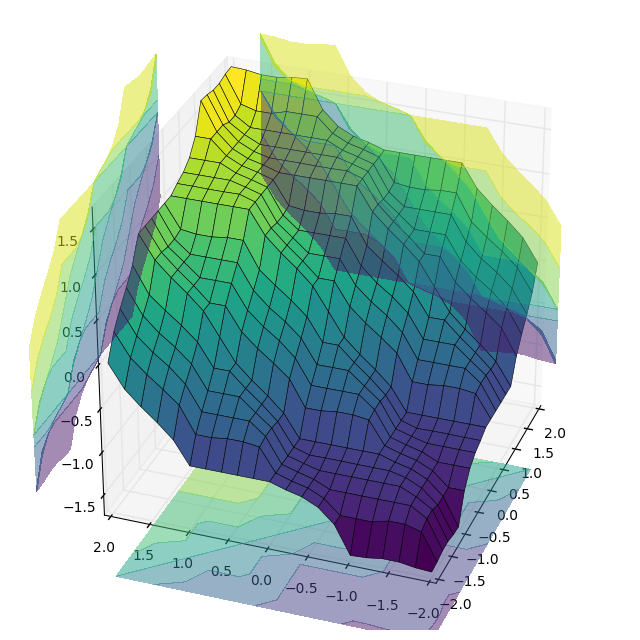

In [13]:
# We can simulate at higher resolution with full accuracy
upsampled = np.linspace(-2, 2, 21)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

# Loop through the system 21*21 times to collect the control surface
for i in range(21):
    for j in range(21):
        sim.input['error'] = x[i, j]
        sim.input['delta'] = y[i, j]
        sim.compute()
        z[i, j] = sim.output['output']

# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5)

ax.view_init(30, 200)

# Final thoughts

* This example used a number of new, advanced techniques which may be helpful in practical fuzzy system design:

    * A highly sparse (maximally sparse) system
    * Control of Term names generated by automf
    * A long and logically complicated ruleset, with order-of-operations respected
    * Control of the cache flushing on creation of a ControlSystemSimulation, which can be tuned as needed depending on memory constraints
    * Repeated runs of a ControlSystemSimulation
    * Creating and viewing a control surface in 3D.